## Binary population synthesis model for spectroscopic binaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import makebinariesrv as rvbin
from sys import exit
from astropy.table import Table
from scipy.stats import reciprocal
from scipy.special import loggamma

In [45]:
def semimajoraxis(n, mean, std, ashape, alim):
    '''Select semi-major axis from eith a lognormal, gaussian or flat
        distribution.'''
    if ashape == "lognormal":
        var = std**2
        mu = np.log(mean**2/(np.sqrt(var+mean**2)))
        sigma = np.sqrt(np.log(1+(var/(mean**2))))
        a = np.exp(mu + sigma*np.random.normal(size=n))
    elif ashape == "gaussian":
        mu = mean
        sigma = std
        a = np.random.normal(loc=mu, scale=sigma, size=n)
    elif ashape == "flat":
        a = np.random.uniform(alim[0],alim[1],size=n)
    return a
        
def eccentricity(n):
    '''Select value for eccentricity.'''
    ecc = np.random.uniform(0, 0.98, n)
    return ecc

# def masses(self):
#     '''Generate the masses for the two stars.'''
#     m1 = np.random.choice(all_objects['m1'], size=self.n)
#     m2 = np.random.choice(all_objects['m2'], size=self.n)
    
# def errors(self):
#     '''Errors on the fake rv measurements from the real data distribution.'''
#     err_rv1 = np.random.choice(all_objects['errors'],size=self.n)
#     err_rv2 = np.random.choice(all_objects['errors'],size=self.n)

# def distance(self):
#     '''Select the distance in kpc.'''
#     if self.dshape == "flat":
#         self.dist = np.random.uniform(self.dlim[0],self.dlim[1],size=self.n)
#     elif self.dshape == "obs":
#         dists = all_objects['dist']
#         self.dist = np.abs(np.random.choice(dists,size=self.n))

# def phase_params(self):
#     '''Select the inclination, orientation and mean anomaly of the system.'''
#     self.inc = np.arcsin(np.random.uniform(size=self.n))
#     self.phi = np.random.uniform(size=self.n)*2*np.pi
#     self.meani = np.random.uniform(size=self.n)*2*np.pi

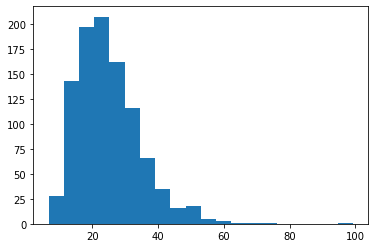

In [47]:
n = 1000
mu = 25
std = 10
ashape = "lognormal"
alim = [5, 100]

a = semimajoraxis(n, mu, std, ashape, alim)
fig, ax = plt.subplots()
ax.hist(a, bins=20)
plt.show()